Nama    : Aphrodity Nirmala Putri

NIM     : 23/511906/PA/21852

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ct
from control.matlab import tf2ss, ss2zpk
from scipy.linalg import eig

In [113]:
A = np.array ([[1, 4],
               [2, 5]])
B = np.array ([[1],
               [0]])
C = np.array ([[4, 0],
               [0, 1]])
D = np.array ([[0],
               [0]])

1. a.

In [114]:
eigenvalues, _ = eig(A)
print("nilai eigen matrix A = ", eigenvalues)

nilai eigen matrix A =  [-0.46410162+0.j  6.46410162+0.j]


1. b. 

In [115]:
n = A.shape[0]
print("n = ", n)
Q = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
print("Q = ", Q)

rank_Q = np.linalg.matrix_rank(Q)
print("rank Q = ", rank_Q)

n =  2
Q =  [[1 1]
 [0 2]]
rank Q =  2


1. c. 

In [116]:
is_stable = np.all(eigenvalues < 0)
print("is_stable = ", is_stable)

is_stable =  False


1. d. 

In [117]:
P_i = [-2 + 1j, -2 - 1j]
K_i = ct.place(A, B, P_i)
A_new_i = A - B @ K_i
eigenvalues_1a_new_i, _ = eig(A_new_i)
print("System after pole i placement:\n", A_new_i)

P_ii = [5j, -5j]
K_ii = ct.place(A, B, P_ii)
A_new_ii = A - B @ K_ii
eigenvalues_1a_new_ii, _ = eig(A_new_ii)
print("System after pole ii placement:\n", A_new_ii)

P_iii = [1 + 2j, 1 - 2j]
K_iii = ct.place(A, B, P_iii)
A_new_iii = A - B @ K_iii
eigenvalues_1a_new_iii, _ = eig(A_new_iii)
print("System after pole iii placement:\n", A_new_iii)

System after pole i placement:
 [[ -9. -25.]
 [  2.   5.]]
System after pole ii placement:
 [[ -5. -25.]
 [  2.   5.]]
System after pole iii placement:
 [[ -3. -10.]
 [  2.   5.]]


1. e. 

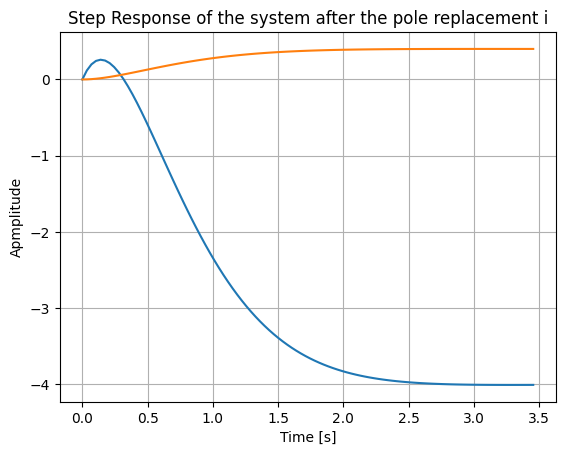

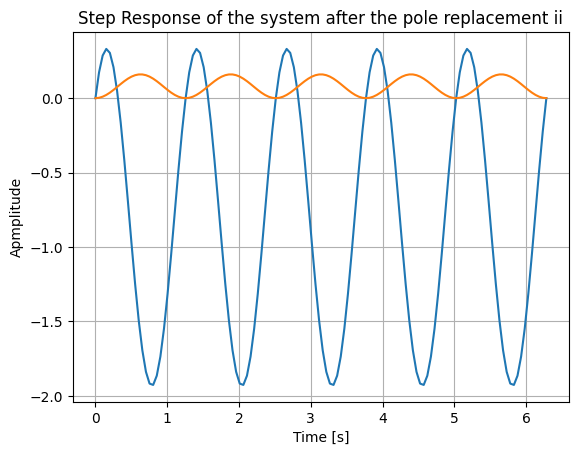

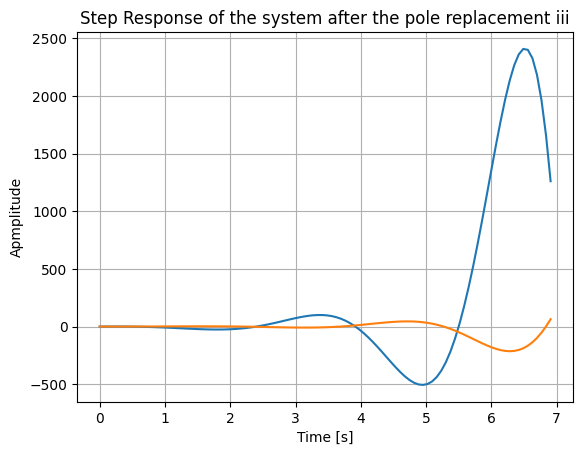

In [118]:
sys_fb = ct.ss(A_new_i, B, C, D)
t, y = ct.step_response(sys_fb)
y = np.squeeze(y)
plt.figure()
plt.plot(t, y.T)
plt.title("Step Response of the system after the pole replacement i")
plt.xlabel("Time [s]")
plt.ylabel("Apmplitude")
plt.grid()
plt.show()

sys_fb = ct.ss(A_new_ii, B, C, D)
t, y = ct.step_response(sys_fb)
y = np.squeeze(y)
plt.figure()
plt.plot(t, y.T)
plt.title("Step Response of the system after the pole replacement ii")
plt.xlabel("Time [s]")
plt.ylabel("Apmplitude")
plt.grid()
plt.show()

sys_fb = ct.ss(A_new_iii, B, C, D)
t, y = ct.step_response(sys_fb)
y = np.squeeze(y)
plt.figure()
plt.plot(t, y.T)
plt.title("Step Response of the system after the pole replacement iii")
plt.xlabel("Time [s]")
plt.ylabel("Apmplitude")
plt.grid()
plt.show()

In [119]:
A = np.array ([[-10, 0, 0, 0, 2],
               [0, 0, 0, 1, 0],
               [-10.5229, -1066.67, -3.38028, 23.5107, 0],
               [0, 339.804, 3.125, -46.51707, 0],
               [0, 0, 0, 10, -10]])
B = np.array ([[5],
               [0],
               [0],
               [0],
               [0]])
C = np.array ([[0, 0, 0, -1.223 * 100000, 0]])
D = np.array ([[0, 0, 0, 0, 0]])


2. a.

In [120]:
eigenvalues, _ = eig(A)
print("nilai eigen matrix A = ", eigenvalues)

nilai eigen matrix A =  [-55.24219178+0.j           2.66903274+5.72285758j
   2.66903274-5.72285758j -10.86391976+0.j
  -9.12930395+0.j        ]


2. b.

In [121]:
is_stable = np.all(eigenvalues < 0)
print("is_stable = ", is_stable)

is_stable =  False


2. c.

In [122]:
n = A.shape[0]
print("n = ", n)
Q = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
print("Q = ", Q)

rank_Q = np.linalg.matrix_rank(Q)
print("rank Q = ", rank_Q)

n =  5
Q =  [[ 5.00000000e+00 -5.00000000e+01  5.00000000e+02 -5.00000000e+03
   4.67115938e+04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.64420312e+02
   9.84834100e+03]
 [ 0.00000000e+00 -5.26145000e+01  7.03996742e+02 -1.15067927e+04
   4.98434287e+05]
 [ 0.00000000e+00  0.00000000e+00 -1.64420312e+02  9.84834100e+03
  -5.49945375e+05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.64420312e+03
   1.14925441e+05]]
rank Q =  5


2. d.

In [137]:
pole_target = np.roots([1, 6, 18])
pole_add = [-80, -90, -100]
print("pole_target = ", pole_target)
pole_desired = np.hstack((pole_target, pole_add))
print("pole_desired = ", pole_desired)

pole_target =  [-3.+3.j -3.-3.j]
pole_desired =  [  -3.+3.j   -3.-3.j  -80.+0.j  -90.+0.j -100.+0.j]


2. e.

In [138]:
K = ct.place(A, B, pole_desired)
A_new = A - B @ K
eigenvalues_new, _ = eig(A_new)
print("System after pole replacement:\n", A_new)

System after pole replacement:
 [[-2.16102650e+02  1.55782678e+05  1.20224317e+03  3.13019631e+03
  -8.88941261e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [-1.05229000e+01 -1.06667000e+03 -3.38028000e+00  2.35107000e+01
   0.00000000e+00]
 [ 0.00000000e+00  3.39804000e+02  3.12500000e+00 -4.65170700e+01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+01
  -1.00000000e+01]]


2. f.

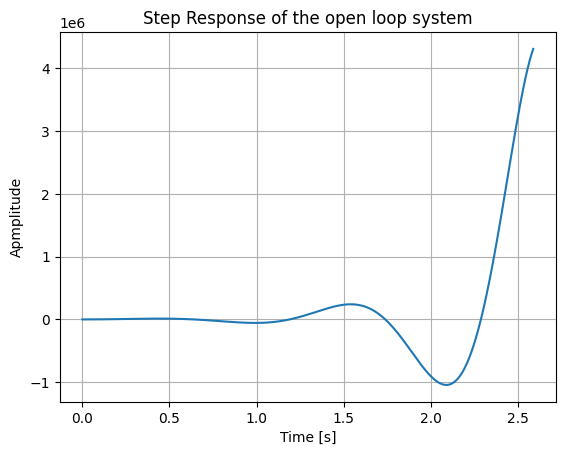

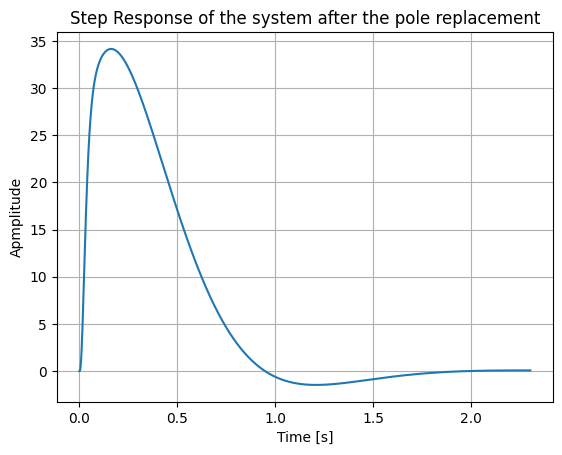

In [139]:
sys_open = ct.ss(A, B, C, 0)
t, y = ct.step_response(sys_open)
y = np.squeeze(y)
plt.figure()
plt.plot(t, y.T)
plt.title("Step Response of the open loop system")
plt.xlabel("Time [s]")
plt.ylabel("Apmplitude")
plt.grid()
plt.show()

sys_fb = ct.ss(A_new, B, C, 0)
t, y = ct.step_response(sys_fb)
y = np.squeeze(y)
plt.figure()
plt.plot(t, y.T)
plt.title("Step Response of the system after the pole replacement")
plt.xlabel("Time [s]")
plt.ylabel("Apmplitude")
plt.grid()
plt.show()